<a href="https://colab.research.google.com/github/garvit968/LangchainTut/blob/main/LinearRegress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
X = tf.reshape(tf.range(12),(3,4))
Y = tf.reshape(tf.range(12), (-1,4))
X==Y, X>Y, X<Y

(<tf.Tensor: shape=(3, 4), dtype=bool, numpy=
 array([[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])>,
 <tf.Tensor: shape=(3, 4), dtype=bool, numpy=
 array([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])>,
 <tf.Tensor: shape=(3, 4), dtype=bool, numpy=
 array([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])>)

In [ ]:
import tensorflow as tf
x=tf.reshape(tf.range(6),(3,1,2)) # 3 stacks 1 row 2 cols
x

<tf.Tensor: shape=(3, 1, 2), dtype=int32, numpy=
array([[[0, 1]],

       [[2, 3]],

       [[4, 5]]], dtype=int32)>

In [ ]:
import os
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..','data','house_tiny.csv')
with open(data_file, 'w') as f:
  f.write('''
  NumRooms,RoofType,Price
NA,NA,127500
2,NA,12000
2,Slate,44545
4,Concrete,NA
  ''')

In [ ]:
import pandas as pd
df = pd.read_csv(data_file)
df

,NumRooms,RoofType,Price
0,NaN,NaN,127500.0
1,2.0,NaN,12000.0
2,2.0,Slate,44545.0
3,4.0,Concrete,NaN


In [ ]:
df.describe()

,NumRooms,Price
count,3.000000,3.000000
mean,2.666667,61348.333333
std,1.154701,59555.239134
min,2.000000,12000.000000
25%,2.000000,28272.500000
50%,2.000000,44545.000000
75%,3.000000,86022.500000
max,4.000000,127500.000000


In [ ]:
df.isna().sum()

,0
NumRooms,1
RoofType,2
Price,1


In [ ]:
df.head()

,NumRooms,RoofType,Price
0,NaN,NaN,127500.0
1,2.0,NaN,12000.0
2,2.0,Slate,44545.0
3,4.0,Concrete,NaN


In [ ]:
df.sample(2)

,NumRooms,RoofType,Price
2,2.0,Slate,44545.0
3,4.0,Concrete,NaN


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X1 = np.random.normal(5,2,1000)
# plt.hist(x=X1, bins = 30)
# plt.show
X2 = X1*0.8 + np.random.normal(0,0.6,1000)
X3 = np.random.normal(-1, 1.5,1000)
X4 = np.random.uniform(0,10,1000)
beta_vals = np.array([2.5,-1.2,0.6,0.05])

noise = np.random.normal(0,1.2,1000)
y = beta_vals[0]*X1+beta_vals[1]*X2+beta_vals[2]*X3+beta_vals[3]*X4+0.4*(X4**2)*0.01+noise

X=np.vstack([X1,X2,X3,X4]).T
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.3)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

def ols_closed_form(X,y):
  Xb = np.hstack([np.ones((X.shape[0],1)), X])
  beta_hat = np.linalg.pinv(Xb.T @ Xb) @ Xb.T @ y
  return beta_hat

beta_hat = ols_closed_form(X_train_s, y_train)
print("Closed-form OLS coefficients (intercept first):")
print(beta_hat)

Closed-form OLS coefficients (intercept first):
[ 7.69643187  4.84128891 -1.98302023  0.97909982  0.27411044]


Closed-form OLS coefficients (intercept first):
[ 7.24840819  4.96819604 -1.98317424  0.81773369  0.28120323]
Train RMSE: 1.2033539565702054
Test  RMSE: 1.1914136325857707
Test R^2: 0.8802822829747798
GD coefficients (intercept first): [ 7.24840819  4.96819604 -1.98317424  0.81773369  0.28120323]
Best Ridge alpha: {'alpha': 0.1} best CV MSE: 1.4696808518306568
Ridge Test RMSE: 1.191152154766841
Ridge Test R^2: 0.8803348257552366
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1470.
Date:                Sun, 07 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:20:04   Log-Likelihood:                -1283.2
No. Observations:                 800   AIC:                             2576.
Df Residuals: 

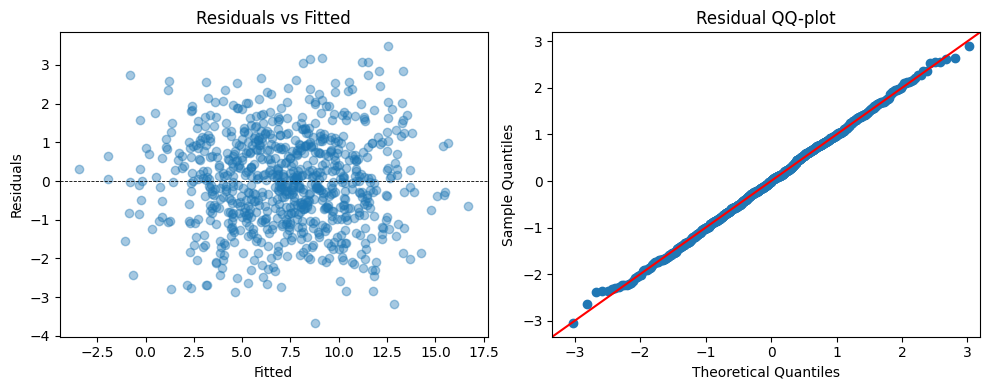

Poly Ridge Test RMSE: 1.2125491538211957


In [24]:
# pip install numpy scipy scikit-learn statsmodels matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

np.random.seed(0)

# 1) Synthesize data
N = 1000
# base features with some correlation
x1 = np.random.normal(5, 2, N)
x2 = 0.8 * x1 + np.random.normal(0, 0.6, N)    # correlated with x1
x3 = np.random.normal(-1, 1.5, N)
# non-linear effect we'll treat via feature engineering
x4 = np.random.uniform(0, 10, N)
# true coefficients (including a small effect for x3)
beta_true = np.array([2.5, -1.2, 0.6, 0.05])  # weights for x1..x4
# Construct target with noise and small nonlinearity
noise = np.random.normal(0, 1.2, N)
y = beta_true[0]*x1 + beta_true[1]*x2 + beta_true[2]*x3 + beta_true[3]*x4 \
    + 0.4 * (x4**2) * 0.01 + noise  # slight quadratic signal in x4

# Stack into design matrix
X = np.vstack([x1, x2, x3, x4]).T

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3) Preprocess: scale
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# 4) OLS closed form (with bias term)
def ols_closed_form(X, y):
    # add intercept column
    Xb = np.hstack([np.ones((X.shape[0], 1)), X])
    # use pseudo-inverse for stability
    beta_hat = np.linalg.pinv(Xb.T @ Xb) @ Xb.T @ y
    return beta_hat  # [intercept, coef...]

beta_hat = ols_closed_form(X_train_s, y_train)
print("Closed-form OLS coefficients (intercept first):")
print(beta_hat)

# Predictions and metrics
def predict_with_beta(beta, X):
    Xb = np.hstack([np.ones((X.shape[0],1)), X])
    return Xb @ beta

y_pred_train = predict_with_beta(beta_hat, X_train_s)
y_pred_test  = predict_with_beta(beta_hat, X_test_s)

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Test R^2:", r2_score(y_test, y_pred_test))

# 5) Gradient descent (batch) for least squares — show interviewer you can do opt
def gradient_descent(X, y, lr=1e-2, n_iter=2000, verbose=False):
    # X assumed scaled, add bias column
    Xb = np.hstack([np.ones((X.shape[0], 1)), X])  # (N, d+1)
    N, D = Xb.shape
    w = np.zeros(D)
    for it in range(n_iter):
        preds = Xb @ w
        grad = (2.0/N) * (Xb.T @ (preds - y))
        w -= lr * grad
        if verbose and (it % 500 == 0):
            loss = np.mean((preds - y)**2)
            print(f"iter {it}, mse {loss:.4f}")
    return w

w_gd = gradient_descent(X_train_s, y_train, lr=0.05, n_iter=5000)
print("GD coefficients (intercept first):", w_gd)

# 6) Ridge with CV selection for alpha
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
param_grid = {"alpha": [0.0, 0.01, 0.1, 1.0, 10.0, 50.0]}
cv = KFold(n_splits=5, shuffle=True, random_state=0)
grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=cv)
grid.fit(X_train_s, y_train)
print("Best Ridge alpha:", grid.best_params_, "best CV MSE:", -grid.best_score_)

best_ridge = grid.best_estimator_
y_ridge_test = best_ridge.predict(X_test_s)
print("Ridge Test RMSE:", np.sqrt(mean_squared_error(y_test, y_ridge_test)))
print("Ridge Test R^2:", r2_score(y_test, y_ridge_test))

# 7) Statsmodels OLS for inference (CIs, p-values)
X_train_sm = sm.add_constant(X_train_s)  # statsmodels needs explicit constant
ols_sm = sm.OLS(y_train, X_train_sm).fit()
print(ols_sm.summary())  # includes coefficients, std err, t, p-values, CI

# 8) Diagnostics: residuals vs fitted and QQ-plot
y_train_fit = ols_sm.fittedvalues
resid = ols_sm.resid

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(y_train_fit, resid, alpha=0.4)
plt.axhline(0, color='k', linestyle='--', linewidth=0.6)
plt.xlabel('Fitted'); plt.ylabel('Residuals'); plt.title('Residuals vs Fitted')

plt.subplot(1,2,2)
sm.qqplot(resid, line='45', fit=True, ax=plt.gca())
plt.title('Residual QQ-plot')
plt.tight_layout()
plt.show()

# 9) If asked for nonlinearity handling: add polynomial feature and refit
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_s)
X_test_poly  = poly.transform(X_test_s)
ridge2 = Ridge(alpha=grid.best_params_['alpha'])
ridge2.fit(X_train_poly, y_train)
print("Poly Ridge Test RMSE:", np.sqrt(mean_squared_error(y_test, ridge2.predict(X_test_poly))))
